## Guia 3
### Mario Guerra Gualy



Trabajaremos para el desarrollo de esta guia 3 datos de los contratos en gobierno colombiano obtenidos de datos abiertos. los datos son los planes anuales de adquisición paa los sistemas SECOP I y SECOP II

### Importación librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
pd.set_option('display.max_columns', None)

### Cargar dataset SECOP I  y SECOP II

In [2]:
dfsecopi=pd.read_csv("ARCHIVOS/datos_secop_I_modified.csv", sep=",")
dfsecopi.head()

,identificador_paa,codigo_entidad,nombre_entidad,nit_entidad,anno_paa,direccion_entidad,telefono_entidad,mision_y_vision,perspectiva_estrategica,info_contacto,ppto_total,limite_menor_cuantia,limite_minima_cuantia,fecha_ultima_actualizacion,fecha_cargue,municipio_paa,departamento_paa,localidad_paa,codigo_municipio
0,303062,28500134,CASANARE ESE HOSPITAL DE YOPAL !,891855029,2022,Calle 15 N 795 Manzana L via marginal de la selva,6344699,MisionEl Hospital Regional de la Orinoquia es ...,el Hospital Regional de la Orinoqua ESE se con...,Almacen Hospital Regional de la Orinoquia Cont...,126898133557,NaN,$nan,12/31/21,2022-01-31T11:53:47.000,Yopal,Casanare,PLAN UNICO,85001
1,294652,205001279,ANTIOQUIA INSTITUCIN EDUCATIVA DBORA ARANGO P...,900196642,2022,Calle 118 103160,5294058,MISION La Institucin Educativa Dbora Arango de...,Direccionar la Institucin para el logro del ho...,Carlos Enrique Rojas Sanchez,$84026639,0,20000000,12/1/21,2022-01-26T09:43:07.000,Medellín,Antioquia,UNICO PLAN,5001
2,259436,286571031,PUTUMAYO CENTRO EDUCATIVO RURAL SAUDITA PUER...,846004233-5,2021,VEREDA SAUDITA,3208339785,MISION El Centro Educativo Rural Saudita garan...,0,3208339785,$107700000,254387280,$25438728,11/27/20,2021-01-28T02:34:58.000,Puerto Guzmán,Putumayo,UNICO PLAN,86571
3,263541,205001191,ANTIOQUIA INSTITUCIN EDUCATIVA SAN CRISTBAL ...,811017472,2021,Carrera 131 No 65 07,4279180,2021,wwwiesancristobaleduco,La Institucin Educativa San Cristbal ofrece ...,La Institucin educativa San Cristbal Lder en l...,JOSE CHARLES VELEZ BETANCURRectoriesancristoba...,159239220,181705200,2021-01-29T04:15:31.000,Medellín,Antioquia,UNICO PLAN,5001
4,298985,250226019,META CENTRO EDUCATIVO RURAL JOSE MARIA GUIOTH...,900134298-9,2022,Vda Caney Medio Km2CumaralMeta,3013604535,Misin,Mejoramiento de la calidad educativa en la pre...,LUIS FERNANDO ROJAS SALAZAR CC 17267322 Cargo ...,$22500000,280000000,$28000000,12/2/21,2022-01-28T07:06:52.000,Cumaral,Meta,UNICO PLAN,50226


In [3]:
dfsecopii=pd.read_csv("ARCHIVOS/datos_secop_II_modified.csv", sep=";", encoding='latin-1')
dfsecopii.head()

,identificador_unico,id_plan_anual_de_adquisiciones,anno,nit_entidad,nombre_entidad,mision_vision,perspectiva_estrategica,nombre_contacto,telefono_contacto,correo_contacto,valor_presupuesto_general,presupuesto_menor_cuantia,presupuesto_minima_cuantia,fecha_de_publicacion,fecha_de_creacion,fecha_de_ultima_modificacion,version,identificador_requerimiento_compra,estado,departamento_paa,municipio_paa
0,CO1.APP.2041264,MarketplaceCO1538159,2024,721520377,INSTITUCION EDUCATIVA AGROPECUARIA MAXIMO GOMEZ,MISION 2023 2026 La Institucin Educativa Agrop...,Ser una institucin destacada por sus estrategi...,MARIA EUGENIA LEDESMA LLANTEN,3104661182,mariaeugenia.maestra@gmail.com,98097506.0,$26000000.0,$2600000.0,2024-07-31 03:47:42.6041815,2024-08-23 07:11:00.0000000,2024-08-22 20:32:26.391947400,2,CO1.PPI.33807381,Borrador,Cauca,Cajibío
1,CO1.APP.2041602,MarketplaceCO1538240,2024,718938582,INSTITUCION EDUCATIVA MUNICIPAL EL SOCORRO,MISION Brindar una formacin acadmica que forme...,El proceso de formacin de los educandos debe e...,RAFAEL BASTIDAS SANCHEZ,3136820189,rafabastidas@hotmail.com,394955722.0,$845000000.0,$84500000.0,2024-01-31 16:19:08.5384812,2024-08-23 07:11:00.0000000,2024-08-22 22:00:52.607658300,13,CO1.PPI.33809817,No especificado,Nariño,Pasto
2,CO1.APP.2041198,MarketplaceCO1538184,2024,703036004,MUNICIPIO LA DORADA,La administracin municipal regir los destinos ...,La Dorada ser un municipio competitivo y soste...,JULIAN DAVID OLIVEROS SERRANO,8572013,compras@ladorada-caldas.gov.co,81756864004.0,$364000000.0,$36400000.0,2024-01-17 20:54:03.3001599,2024-08-23 07:11:00.0000000,2024-08-22 21:03:45.672865800,28,CO1.PPI.33808340,Borrador,Caldas,La Dorada
3,CO1.APP.2041074,MarketplaceCO1538121,2024,723119863,COOAGUAS DE PUEBLO NUEVO E.S.P.,MISION LA ADMINISTRACION PBLICA COOPERATIVA EM...,POLITICA DE CALIDAD Somos un organismo pblico ...,CARLOS FERNANDO GERMAN CALAO,3127695263,carlosgcalao@outlook.com,$1006390000.0,174000000.0,116000000.0,2024-02-01 02:01:48.3772533,2024-08-23 07:11:00.0000000,2024-08-22 19:47:30.908245300,2,CO1.PPI.33805980,Borrador,Córdoba,Pueblo Nuevo
4,CO1.APP.2041030,MarketplaceCO1415172,2024,705153815,MUNICIPIO DE LA PLATA,Gestionar servir a la comunidad promover el bi...,A travs de la implementacin del presente Plan ...,CRISTINA HOLGUIN GRISALES,3223001245,almacen@laplata-huila.gov.co,17288164198.0,$364000000.0,$36400000.0,2024-01-10 15:55:50.6223556,2024-08-23 07:11:00.0000000,2024-08-22 15:48:03.701324800,148,CO1.PPI.33799556,Publicado,Huila,La Plata


Trabajaremos para limpiar lo mejor que se pueda los datasets, para ello cargaremos funciones de limpieza

In [4]:
class DataSetCleaning:
    #Función para inicializar la clase
    def __init__(self, df):
        self.df = df
    #Función para revisar valores duplicados en una columna específica por valor unico
    def count_unique_values(self, col):
        # Utiliza value_counts() para contar las ocurrencias de cada valor único en la columna
        value_counts = self.df[col].value_counts()
        return value_counts
        
    #Función para revisar que caracteres especiales unicos existen en cada columna
    def special_characters(self):
        # Diccionario para almacenar los caracteres especiales por columna
        special_chars = {}
        # Definir una expresión regular para identificar caracteres especiales
        regex = re.compile('[^a-zA-Z0-9\s\.]')
        
        for column in self.df.columns:
            # Conjunto para recolectar caracteres especiales únicos
            unique_chars = set()
            # Extraer caracteres especiales de cada celda, agregarlos al conjunto para asegurar unicidad
            self.df[column].astype(str).apply(lambda x: unique_chars.update(regex.findall(x)))
            # Convertir el conjunto a lista y almacenarlo en el diccionario
            special_chars[column] = list(unique_chars)
        return special_chars

    #Función para revisar que caracteres especiales unicos existen en cada columna
    def special_characters_num(self):
        # Diccionario para almacenar los caracteres especiales por columna
        special_chars = {}
        # Definir una expresión regular para identificar caracteres especiales
        regex = re.compile('[^\d]')
        
        for column in self.df.columns:
            # Conjunto para recolectar caracteres especiales únicos
            unique_chars = set()
            # Extraer caracteres especiales de cada celda, agregarlos al conjunto para asegurar unicidad
            self.df[column].astype(str).apply(lambda x: unique_chars.update(regex.findall(x)))
            # Convertir el conjunto a lista y almacenarlo en el diccionario
            special_chars[column] = list(unique_chars)
        return special_chars

    #Función para eliminar caracteres especiales en una columna específica
    def remove_special_characters(self, col):
        # Definir una expresión regular para identificar caracteres especiales
        regex = re.compile('[^a-zA-Z0-9\s\.]')
        # Reemplazar caracteres especiales con una cadena vacía
        self.df[col] = self.df[col].str.replace(regex, '',regex=True)
        return self.df

  #Función para eliminar caracteres especiales en una columna específica
    def remove_special_characters_num(self, col):
        # Definir una expresión regular para identificar caracteres especiales
        regex = re.compile('[^\d]')
        # Reemplazar caracteres especiales con una cadena vacía
        self.df[col] = self.df[col].str.replace(regex, '',regex=True)
        return self.df

### Limpieza de Secop I

In [5]:
dfsecopi.head()

,identificador_paa,codigo_entidad,nombre_entidad,nit_entidad,anno_paa,direccion_entidad,telefono_entidad,mision_y_vision,perspectiva_estrategica,info_contacto,ppto_total,limite_menor_cuantia,limite_minima_cuantia,fecha_ultima_actualizacion,fecha_cargue,municipio_paa,departamento_paa,localidad_paa,codigo_municipio
0,303062,28500134,CASANARE ESE HOSPITAL DE YOPAL !,891855029,2022,Calle 15 N 795 Manzana L via marginal de la selva,6344699,MisionEl Hospital Regional de la Orinoquia es ...,el Hospital Regional de la Orinoqua ESE se con...,Almacen Hospital Regional de la Orinoquia Cont...,126898133557,NaN,$nan,12/31/21,2022-01-31T11:53:47.000,Yopal,Casanare,PLAN UNICO,85001
1,294652,205001279,ANTIOQUIA INSTITUCIN EDUCATIVA DBORA ARANGO P...,900196642,2022,Calle 118 103160,5294058,MISION La Institucin Educativa Dbora Arango de...,Direccionar la Institucin para el logro del ho...,Carlos Enrique Rojas Sanchez,$84026639,0,20000000,12/1/21,2022-01-26T09:43:07.000,Medellín,Antioquia,UNICO PLAN,5001
2,259436,286571031,PUTUMAYO CENTRO EDUCATIVO RURAL SAUDITA PUER...,846004233-5,2021,VEREDA SAUDITA,3208339785,MISION El Centro Educativo Rural Saudita garan...,0,3208339785,$107700000,254387280,$25438728,11/27/20,2021-01-28T02:34:58.000,Puerto Guzmán,Putumayo,UNICO PLAN,86571
3,263541,205001191,ANTIOQUIA INSTITUCIN EDUCATIVA SAN CRISTBAL ...,811017472,2021,Carrera 131 No 65 07,4279180,2021,wwwiesancristobaleduco,La Institucin Educativa San Cristbal ofrece ...,La Institucin educativa San Cristbal Lder en l...,JOSE CHARLES VELEZ BETANCURRectoriesancristoba...,159239220,181705200,2021-01-29T04:15:31.000,Medellín,Antioquia,UNICO PLAN,5001
4,298985,250226019,META CENTRO EDUCATIVO RURAL JOSE MARIA GUIOTH...,900134298-9,2022,Vda Caney Medio Km2CumaralMeta,3013604535,Misin,Mejoramiento de la calidad educativa en la pre...,LUIS FERNANDO ROJAS SALAZAR CC 17267322 Cargo ...,$22500000,280000000,$28000000,12/2/21,2022-01-28T07:06:52.000,Cumaral,Meta,UNICO PLAN,50226


In [6]:
dfsecopi.shape

(1000, 19)

In [7]:
dfsecopi.columns

Index(['identificador_paa', 'codigo_entidad', 'nombre_entidad', 'nit_entidad',
       'anno_paa', 'direccion_entidad', 'telefono_entidad', 'mision_y_vision',
       'perspectiva_estrategica', 'info_contacto', 'ppto_total',
       'limite_menor_cuantia', 'limite_minima_cuantia',
       'fecha_ultima_actualizacion', 'fecha_cargue', 'municipio_paa',
       'departamento_paa', 'localidad_paa', 'codigo_municipio'],
      dtype='object')

In [8]:
dfsecopi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   identificador_paa           1000 non-null   int64 
 1   codigo_entidad              1000 non-null   int64 
 2   nombre_entidad              1000 non-null   object
 3   nit_entidad                 1000 non-null   object
 4   anno_paa                    1000 non-null   int64 
 5   direccion_entidad           1000 non-null   object
 6   telefono_entidad            1000 non-null   object
 7   mision_y_vision             997 non-null    object
 8   perspectiva_estrategica     950 non-null    object
 9   info_contacto               998 non-null    object
 10  ppto_total                  998 non-null    object
 11  limite_menor_cuantia        990 non-null    object
 12  limite_minima_cuantia       990 non-null    object
 13  fecha_ultima_actualizacion  989 non-null    objec

Se debe revisar con mas detalle los campos que tienen valores nulos

In [9]:
#vamos a buscar valores duplicados en el dfsecopi
dfsecopi.duplicated().sum()

0

In [10]:
#Instanciamos la clase
limpieza = DataSetCleaning(dfsecopi)

In [11]:
limpieza.count_unique_values('nombre_entidad')

nombre_entidad
CAQUET  ALCALDA MUNICIPIO DE EL DONCELLO                              3
TOLIMA  ALCALDA MUNICIPIO DE VILLARRICA                               2
ANTIOQUIA   INSTITUCIN EDUCATIVA HERNN VILLA BAENA  BELLO             2
MAGDALENA  PERSONERA MUNICIPIO DE PUEBLO VIEJO                        2
ANTIOQUIA  INSTITUCIN EDUCATIVA LA CAMILA  BELLO                      2
                                                                     ..
ANTIOQUIA  ALCALDA MUNICIPIO DE VENECIA                               1
  CUNDINAMARCA  INSTITUTO DEL DEPORTE Y LA RECREACIN DE CHOCONTA      1
BOGOT DC  IED FRIEDRICH NAUMANN                                       1
BOLVAR  INSTITUCIN EDUCATIVA DE EVITAR  MAHATES                       1
CESAR  INSTITUTO MUNICIPAL DE DEPORTES RECREACIN Y CULTURA IMDREC     1
Name: count, Length: 970, dtype: int64

In [12]:
limpieza.count_unique_values('anno_paa')

anno_paa
2022    418
2021    417
2023    143
2020     22
Name: count, dtype: int64

In [13]:
limpieza.count_unique_values('municipio_paa')

municipio_paa
Bogotá D.C.     44
Medellín        25
Cali            17
Barranquilla    14
Pereira         13
                ..
Guapotá          1
Argelia          1
Corinto          1
Simijaca         1
Uramita          1
Name: count, Length: 511, dtype: int64

In [14]:
limpieza.count_unique_values('departamento_paa') 

departamento_paa
Cundinamarca                                93
Antioquia                                   87
Boyacá                                      72
Tolima                                      70
Nariño                                      69
Huila                                       59
Santander                                   58
Valle del Cauca                             51
Bogotá D.C.                                 44
Sucre                                       41
Meta                                        38
Caldas                                      36
Bolívar                                     33
Atlántico                                   26
Risaralda                                   23
Caquetá                                     21
Magdalena                                   20
Córdoba                                     19
La Guajira                                  17
Quindío                                     17
Cauca                                      

In [15]:
limpieza.special_characters()

{'identificador_paa': [],
 'codigo_entidad': [],
 'nombre_entidad': ['Ñ',
  '+',
  '-',
  '(',
  '>',
  '\\',
  '*',
  '[',
  '|',
  '{',
  '"',
  "'",
  ']',
  '$',
  '}',
  ':',
  '%',
  '@',
  '?',
  '!',
  '#',
  '^',
  ',',
  ';',
  ')',
  '_',
  '=',
  '&',
  '<',
  '/'],
 'nit_entidad': ['¿', '-'],
 'anno_paa': [],
 'direccion_entidad': ['+',
  '(',
  '>',
  '\\',
  '*',
  '[',
  '|',
  '{',
  "'",
  '"',
  ']',
  '$',
  '}',
  ':',
  '%',
  '@',
  '/',
  '?',
  '!',
  '#',
  '^',
  ';',
  ',',
  ')',
  '_',
  '=',
  '&',
  '<',
  '-'],
 'telefono_entidad': [],
 'mision_y_vision': ['ñ'],
 'perspectiva_estrategica': ['Ñ', 'ñ'],
 'info_contacto': ['ñ'],
 'ppto_total': ['$'],
 'limite_menor_cuantia': ['$'],
 'limite_minima_cuantia': ['$'],
 'fecha_ultima_actualizacion': [':',
  ',',
  ')',
  '"',
  '/',
  '?',
  '$',
  '(',
  '¿',
  '-'],
 'fecha_cargue': [':', '-'],
 'municipio_paa': ['ü', 'ñ', 'á', 'é', 'ú', 'ó', 'í', '/'],
 'departamento_paa': ['ñ', ',', 'á', 'é', 'ó', 'í'],
 'l

Vemos varias cosas a revisar
hay campos que deben cambiar su tipo de dato, como son lo que deberian tener cifras, esto hace que entremos a analizar con mas detalle que caracteres traen estos campos que deberian ser numericos, campo nombre entidad trae muchos caracteres especiales, se trabajara en removerlos. El campo direccion trae muchos caracteres, pero en este caso no se trabajara en ella, en el campo NIT, se trabaja en remover esos dos caracteres especiales.

In [16]:
limpieza.remove_special_characters('nit_entidad')
limpieza.remove_special_characters('nombre_entidad')
limpieza.remove_special_characters('ppto_total')
limpieza.remove_special_characters('limite_menor_cuantia') 
limpieza.remove_special_characters('limite_minima_cuantia') 


,identificador_paa,codigo_entidad,nombre_entidad,nit_entidad,anno_paa,direccion_entidad,telefono_entidad,mision_y_vision,perspectiva_estrategica,info_contacto,ppto_total,limite_menor_cuantia,limite_minima_cuantia,fecha_ultima_actualizacion,fecha_cargue,municipio_paa,departamento_paa,localidad_paa,codigo_municipio
0,303062,28500134,CASANARE ESE HOSPITAL DE YOPAL,891855029,2022,Calle 15 N 795 Manzana L via marginal de la selva,6344699,MisionEl Hospital Regional de la Orinoquia es ...,el Hospital Regional de la Orinoqua ESE se con...,Almacen Hospital Regional de la Orinoquia Cont...,126898133557,NaN,nan,12/31/21,2022-01-31T11:53:47.000,Yopal,Casanare,PLAN UNICO,85001
1,294652,205001279,ANTIOQUIA INSTITUCIN EDUCATIVA DBORA ARANGO P...,900196642,2022,Calle 118 103160,5294058,MISION La Institucin Educativa Dbora Arango de...,Direccionar la Institucin para el logro del ho...,Carlos Enrique Rojas Sanchez,84026639,0,20000000,12/1/21,2022-01-26T09:43:07.000,Medellín,Antioquia,UNICO PLAN,5001
2,259436,286571031,PUTUMAYO CENTRO EDUCATIVO RURAL SAUDITA PUER...,8460042335,2021,VEREDA SAUDITA,3208339785,MISION El Centro Educativo Rural Saudita garan...,0,3208339785,107700000,254387280,25438728,11/27/20,2021-01-28T02:34:58.000,Puerto Guzmán,Putumayo,UNICO PLAN,86571
3,263541,205001191,ANTIOQUIA INSTITUCIN EDUCATIVA SAN CRISTBAL ...,811017472,2021,Carrera 131 No 65 07,4279180,2021,wwwiesancristobaleduco,La Institucin Educativa San Cristbal ofrece ...,La Institucin educativa San Cristbal Lder en l...,JOSE CHARLES VELEZ BETANCURRectoriesancristoba...,159239220,181705200,2021-01-29T04:15:31.000,Medellín,Antioquia,UNICO PLAN,5001
4,298985,250226019,META CENTRO EDUCATIVO RURAL JOSE MARIA GUIOTH...,9001342989,2022,Vda Caney Medio Km2CumaralMeta,3013604535,Misin,Mejoramiento de la calidad educativa en la pre...,LUIS FERNANDO ROJAS SALAZAR CC 17267322 Cargo ...,22500000,280000000,28000000,12/2/21,2022-01-28T07:06:52.000,Cumaral,Meta,UNICO PLAN,50226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,271499,205001175,ANTIOQUIA INSTITUCIN EDUCATIVA SANTA ELENA M...,811017836,2021,KILOMETRO 15 SANTA ELENA,5381304,MISION Formamos a nios nias y jvenes apoyados ...,Un colegio con un modelo de gestin certificad...,SILVIA ELENA RENDON GARZON,92111926,17556040,24578456,11/30/20,2021-01-31T08:01:37.000,Medellín,Antioquia,UNICO PLAN,5001
996,278692,218756025,CAQUET CE PEAS BLANCAS SOLANO,900155525,2021,VEREDA CAMPO ALEGRE,3209439424,MISION La IER Campo Alegre ofrece a todos los ...,Ofrecer calidad educativa en cada sede de la i...,ELSY LUCIA GONZALEZ PALACIOS,15800000 QUINCE MILLONES OCHOCIENTOS MIL PESOS,20 SMMLV,20 SMMLV,18 de diciembre del a¿o 2020,2021-04-15T10:49:31.000,Solano,Caquetá,UNICO PLAN,18756
997,322980,205842019,ANTIOQUIA PERSONERIA MUNICIPAL DE URAMITA UR...,8909845757,2022,-Calle 20 N 1734 Palacio Municipal 2 piso URA...,317 400 4524,MISIN Continuar trabajando por y con la comun...,La Personera Municipal de Uramita acorde con l...,Abdn Lpez suga Personero MunicipalTelfono 317 ...,14500000,254387280,25250000,10/1/22,2022-11-29T11:31:24.000,Uramita,Antioquia,PERSONERIA MUNICIPAL,5842
998,318983,24100125,HUILA INSTITUCIN EDUCATIVA SANTA LIBRADA NEIVA,891180005,2022,Cra 12 No 1612 B Neiva Huila,8750407,VISION Para el ao 2020 la Institucin Educativa...,La Institucin Educativa Santa Librada de Neiva...,Nury Quintero Rodriguez Pagadora,108416516,245784840,24578484,14 de Julio de 2022,2022-07-14T00:01:24.000,Neiva,Huila,PAA,41001


In [17]:
dfsecopi[dfsecopi['identificador_paa']==255460]

,identificador_paa,codigo_entidad,nombre_entidad,nit_entidad,anno_paa,direccion_entidad,telefono_entidad,mision_y_vision,perspectiva_estrategica,info_contacto,ppto_total,limite_menor_cuantia,limite_minima_cuantia,fecha_ultima_actualizacion,fecha_cargue,municipio_paa,departamento_paa,localidad_paa,codigo_municipio
200,255460,252083022,NARIO INSTITUCION EDUCATIVA NUESTRA SEORA DE ...,91.202.084 95,2021,CRA 4 No 6 44 BARRIO AVENIDA DE LOS ESTUDIAN...,3113098156,VISINLa Institucin educativa Nuestra Seora de ...,La Institucion educativa Nuestra Seora de Beln...,RUBIO BRAVO ORTIZ,386555570,254387280,25438728,1/21/21,2021-01-23T09:22:34.000,Belén,Nariño,UNICO PLAN,52083


Vemos para este caso aprticular que aun hay caracteres especiales en el nit, revisamos con nustra otra función para valdiar mas caracteres especiales

In [18]:
limpieza.special_characters_num()

{'identificador_paa': [],
 'codigo_entidad': [],
 'nombre_entidad': ['O',
  ' ',
  'L',
  'Q',
  'U',
  'Z',
  'H',
  'R',
  'C',
  'J',
  'K',
  'V',
  'E',
  'X',
  'F',
  'P',
  'M',
  'N',
  'I',
  'Y',
  'A',
  'B',
  'T',
  '.',
  'S',
  'G',
  'D'],
 'nit_entidad': [' ', 'o', 'd', 'N', 'i', 'n', '.', 'e', 'D', 'f'],
 'anno_paa': [],
 'direccion_entidad': ['+',
  'c',
  'o',
  'Z',
  '>',
  'R',
  'J',
  'V',
  'r',
  '?',
  'I',
  'Y',
  '!',
  '#',
  '^',
  'z',
  'y',
  'e',
  'G',
  's',
  ' ',
  'a',
  '(',
  'g',
  'q',
  '[',
  '|',
  'n',
  'p',
  'f',
  ';',
  ')',
  '<',
  'W',
  'D',
  '-',
  '{',
  'O',
  'U',
  'm',
  'u',
  "'",
  ']',
  'K',
  '}',
  'P',
  '@',
  'i',
  'd',
  ',',
  'B',
  'h',
  'j',
  't',
  'L',
  'b',
  'Q',
  'v',
  'H',
  '\\',
  '*',
  '"',
  'C',
  '$',
  'E',
  ':',
  'F',
  'M',
  '%',
  'N',
  'l',
  'x',
  'A',
  '_',
  '=',
  'T',
  '.',
  'S',
  '&',
  '/'],
 'telefono_entidad': ['O',
  ' ',
  't',
  'c',
  'o',
  'L',
  'a',
  'v',

Vemos que para los casos de nit_entidad, ppto_total, limite_menor_cuantia y limite_minima_cuantia, tiene aun letras, asi que vamos a remover eso caracteres

In [19]:
limpieza.remove_special_characters_num('nit_entidad')
limpieza.remove_special_characters_num('ppto_total')
limpieza.remove_special_characters_num('limite_menor_cuantia')
limpieza.remove_special_characters_num('limite_minima_cuantia')


,identificador_paa,codigo_entidad,nombre_entidad,nit_entidad,anno_paa,direccion_entidad,telefono_entidad,mision_y_vision,perspectiva_estrategica,info_contacto,ppto_total,limite_menor_cuantia,limite_minima_cuantia,fecha_ultima_actualizacion,fecha_cargue,municipio_paa,departamento_paa,localidad_paa,codigo_municipio
0,303062,28500134,CASANARE ESE HOSPITAL DE YOPAL,891855029,2022,Calle 15 N 795 Manzana L via marginal de la selva,6344699,MisionEl Hospital Regional de la Orinoquia es ...,el Hospital Regional de la Orinoqua ESE se con...,Almacen Hospital Regional de la Orinoquia Cont...,126898133557,NaN,,12/31/21,2022-01-31T11:53:47.000,Yopal,Casanare,PLAN UNICO,85001
1,294652,205001279,ANTIOQUIA INSTITUCIN EDUCATIVA DBORA ARANGO P...,900196642,2022,Calle 118 103160,5294058,MISION La Institucin Educativa Dbora Arango de...,Direccionar la Institucin para el logro del ho...,Carlos Enrique Rojas Sanchez,84026639,0,20000000,12/1/21,2022-01-26T09:43:07.000,Medellín,Antioquia,UNICO PLAN,5001
2,259436,286571031,PUTUMAYO CENTRO EDUCATIVO RURAL SAUDITA PUER...,8460042335,2021,VEREDA SAUDITA,3208339785,MISION El Centro Educativo Rural Saudita garan...,0,3208339785,107700000,254387280,25438728,11/27/20,2021-01-28T02:34:58.000,Puerto Guzmán,Putumayo,UNICO PLAN,86571
3,263541,205001191,ANTIOQUIA INSTITUCIN EDUCATIVA SAN CRISTBAL ...,811017472,2021,Carrera 131 No 65 07,4279180,2021,wwwiesancristobaleduco,La Institucin Educativa San Cristbal ofrece ...,159339220,4279180,159239220,181705200,2021-01-29T04:15:31.000,Medellín,Antioquia,UNICO PLAN,5001
4,298985,250226019,META CENTRO EDUCATIVO RURAL JOSE MARIA GUIOTH...,9001342989,2022,Vda Caney Medio Km2CumaralMeta,3013604535,Misin,Mejoramiento de la calidad educativa en la pre...,LUIS FERNANDO ROJAS SALAZAR CC 17267322 Cargo ...,22500000,280000000,28000000,12/2/21,2022-01-28T07:06:52.000,Cumaral,Meta,UNICO PLAN,50226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,271499,205001175,ANTIOQUIA INSTITUCIN EDUCATIVA SANTA ELENA M...,811017836,2021,KILOMETRO 15 SANTA ELENA,5381304,MISION Formamos a nios nias y jvenes apoyados ...,Un colegio con un modelo de gestin certificad...,SILVIA ELENA RENDON GARZON,92111926,17556040,24578456,11/30/20,2021-01-31T08:01:37.000,Medellín,Antioquia,UNICO PLAN,5001
996,278692,218756025,CAQUET CE PEAS BLANCAS SOLANO,900155525,2021,VEREDA CAMPO ALEGRE,3209439424,MISION La IER Campo Alegre ofrece a todos los ...,Ofrecer calidad educativa en cada sede de la i...,ELSY LUCIA GONZALEZ PALACIOS,15800000,20,20,18 de diciembre del a¿o 2020,2021-04-15T10:49:31.000,Solano,Caquetá,UNICO PLAN,18756
997,322980,205842019,ANTIOQUIA PERSONERIA MUNICIPAL DE URAMITA UR...,8909845757,2022,-Calle 20 N 1734 Palacio Municipal 2 piso URA...,317 400 4524,MISIN Continuar trabajando por y con la comun...,La Personera Municipal de Uramita acorde con l...,Abdn Lpez suga Personero MunicipalTelfono 317 ...,14500000,254387280,25250000,10/1/22,2022-11-29T11:31:24.000,Uramita,Antioquia,PERSONERIA MUNICIPAL,5842
998,318983,24100125,HUILA INSTITUCIN EDUCATIVA SANTA LIBRADA NEIVA,891180005,2022,Cra 12 No 1612 B Neiva Huila,8750407,VISION Para el ao 2020 la Institucin Educativa...,La Institucin Educativa Santa Librada de Neiva...,Nury Quintero Rodriguez Pagadora,108416516,245784840,24578484,14 de Julio de 2022,2022-07-14T00:01:24.000,Neiva,Huila,PAA,41001


In [20]:
dfsecopi[dfsecopi['ppto_total']==''].count()

identificador_paa             28
codigo_entidad                28
nombre_entidad                28
nit_entidad                   28
anno_paa                      28
direccion_entidad             28
telefono_entidad              28
mision_y_vision               28
perspectiva_estrategica       28
info_contacto                 27
ppto_total                    28
limite_menor_cuantia          28
limite_minima_cuantia         27
fecha_ultima_actualizacion    28
fecha_cargue                  28
municipio_paa                 28
departamento_paa              28
localidad_paa                 28
codigo_municipio              28
dtype: int64

In [21]:
dfsecopi[dfsecopi['limite_menor_cuantia']==''].count()

identificador_paa             23
codigo_entidad                23
nombre_entidad                23
nit_entidad                   23
anno_paa                      23
direccion_entidad             23
telefono_entidad              23
mision_y_vision               23
perspectiva_estrategica       22
info_contacto                 23
ppto_total                    23
limite_menor_cuantia          23
limite_minima_cuantia         17
fecha_ultima_actualizacion    22
fecha_cargue                  23
municipio_paa                 23
departamento_paa              23
localidad_paa                 23
codigo_municipio              23
dtype: int64

In [22]:
dfsecopi[dfsecopi['limite_minima_cuantia']==''].count()

identificador_paa             17
codigo_entidad                17
nombre_entidad                17
nit_entidad                   17
anno_paa                      17
direccion_entidad             17
telefono_entidad              17
mision_y_vision               17
perspectiva_estrategica       17
info_contacto                 17
ppto_total                    17
limite_menor_cuantia          15
limite_minima_cuantia         17
fecha_ultima_actualizacion    16
fecha_cargue                  17
municipio_paa                 17
departamento_paa              17
localidad_paa                 17
codigo_municipio              17
dtype: int64

Para los tres anteriores campos se evidencia que no tiene un valor que se pueda convertir a número, para ello, rempalzaremos el valor por cero

In [23]:
dfsecopi['ppto_total']=dfsecopi['ppto_total'].replace('',0)
dfsecopi['limite_menor_cuantia']=dfsecopi['limite_menor_cuantia'].replace('',0)
dfsecopi['limite_minima_cuantia']=dfsecopi['limite_minima_cuantia'].replace('',0)

Intentemos convertir el datos a flotante

In [24]:
dfsecopi['ppto_total'] = dfsecopi['ppto_total'].astype('float')
dfsecopi['limite_menor_cuantia'] = dfsecopi['limite_menor_cuantia'].astype('float')
dfsecopi['limite_minima_cuantia'] = dfsecopi['limite_minima_cuantia'].astype('float')

Validaremos lo mismo con el Nit

In [25]:
dfsecopi[dfsecopi['nit_entidad']=='']

,identificador_paa,codigo_entidad,nombre_entidad,nit_entidad,anno_paa,direccion_entidad,telefono_entidad,mision_y_vision,perspectiva_estrategica,info_contacto,ppto_total,limite_menor_cuantia,limite_minima_cuantia,fecha_ultima_actualizacion,fecha_cargue,municipio_paa,departamento_paa,localidad_paa,codigo_municipio
87,255663,1002162,BOGOT DC IED CAMPESTRE MONTE VERDE,,2021,CR 5 C ESTE 98A 55,6320241,EL COLEGIO CAMPESTRE MONTEVERDE como Instituci...,COLEGIO CAMPESTRE MONTEVERDE IED,ROSENDO CASTIBLANCO,2.143980e+08,254387280.0,25438728.0,1/31/21,2021-01-25T09:19:03.000,Bogotá D.C.,Bogotá D.C.,UNICO PLAN,1101
139,327517,268255011,SANTANDER ALCALDA MUNICIPIO DE EL PLAYN,,2023,CRA 5 N 12 41,321 2214331,MISION CONTRIBUIR AL DESARROLLO INTEGRAL Y SOS...,PROMOVER EL DESARROLLO INTEGRAL DEL MUNICIPIO ...,Dania katherine Sandoval cote,5.572695e+09,324800000.0,32480000.0,30 DE ENERO DE 2023,2023-01-30T03:50:53.000,El Playón,Santander,UNICO PLAN,68255
244,308621,227077011,CHOC ALCALDA MUNICIPIO DE BAJO BAUD,,2022,ALCALDA DEL BAJO BAUD PIZARRO CHOC,680 6304 312 299 6143,En el ao 2024 El Bajo Baud ser un municipio ms...,El municipio Bajo Baud es una entidad territor...,JANIO ARELINO POSSO REYES,3.483958e+10,280000000.0,28000000.0,1/31/22,2022-01-31T06:40:54.000,Bajo Baudó/Pizarro,Chocó,UNICO PLAN,27077
261,293420,1002080,BOGOT DC IED VILLEMAR EL CARMEN,,2022,CALLE 20 D No 96 G 51,4216751,formar jovenes en competencias habilidades y s...,Elcolegio villemar a partir de su visin consid...,PABLO ALEJANDRO SALAZAR RESTREPO RECTOR ORDENA...,2.931668e+08,280000000.0,28000000.0,11/4/21,2022-01-24T02:43:13.000,Bogotá D.C.,Bogotá D.C.,UNICO PLAN,1101
310,318462,1002059,BOGOT DC IED RAMON DE ZUBIRIA,,2022,Calle 130 D No 88 B 49,692 22 78 681 1682 692 65 84 681 35 06,MISINEl colegio Ramn de Zubira IED como Insti...,Promover el cumplimiento de la misin y la visi...,DIANA MILENA MUOZ RODRIGUEZ dmmunozreducacion...,5.862524e+08,28000000.0,20000000.0,6/30/22,2022-06-30T06:01:40.000,Bogotá D.C.,Bogotá D.C.,UNICO PLAN,1101
319,281708,266088022,RISARALDA ESE HOSPITAL SAN JOS DE BELN DE UMBRA,,2021,CRA 13 4 135,096 3528128,MISION La ESE Hospital San Jos de Beln de Umbr...,Mejorar la cobertura de nuestros servicios pri...,Juan Esteban Bernal Villa ...,6.966705e+09,290728320.0,290728320.0,7/9/21,2021-07-09T03:21:02.000,Belén de Umbría,Risaralda,UNICO PLAN,66088
347,293393,1002147,BOGOT DC IED FRIEDRICH NAUMANN,,2022,CALLE 171B No 6B16,6792369,El colegio Friederich Naumann IED busca formar...,El modelo pedaggico desarrollado en nuestra in...,Margarita Siabato PatioRectoracedfriedrichnaum...,2.181772e+08,254387280.0,25438728.0,2/12/21,2022-01-24T02:00:49.000,Bogotá D.C.,Bogotá D.C.,PAA VIGENCIA 2022 SECOP I,1101
370,274171,1002240,BOGOT DC IED COLEGIO DIEGO MONTAA CULLAR,,2021,TRAV 6 B 100 C 55 SUR,3002068107,MISIONEl Colegio DIEGO MONTAA CUELLAR IED es u...,El Colegio tiene tres factores claves de xito ...,NOHORA MARIA ESCOBAR CARDENAS AUXILIAR FINACI...,2.592596e+08,245784840.0,24578484.0,30 de Enero de 2021,2021-02-04T08:46:48.000,Bogotá D.C.,Bogotá D.C.,UNICO PLAN,1101
377,255165,1002071,BOGOT DC IED FABIO LOZANO SIMONELLI,,2021,CARRERA 4 ESTE NO 6531 SUR,7621132,Mision El colegio Fabio Lozano Simonelli inst...,Educacin integral para una mejor calidad de vida,GRACIELA AMANDA DIAZ GUERRERO 7621132,2.234000e+08,18170520.0,25438728.0,1/22/21,2021-01-22T11:50:33.000,Bogotá D.C.,Bogotá D.C.,PAA,1101
394,335984,1002255,BOGOT DC IED ANTONIO VILLAVICENCIO,,2023,CALLE 70F 110 11,4330565,MISION OFRECER A LOS EDUCANDOS DE LA LOCALIDAD...,GENERADORES DE PROGRESO COMUNICACIN Y CONVICEN...,Libardo Francisco Castillo Montilla,2.274435e+08,324800000.0,32480000.0,6/23/23,2023-06-23T06:10:18.000,Bogotá D.C.,Bogotá D.C.,COLEGIO ANTONIO VILLAVICENCIO IED,1101


Vamos a excluir estos registros, ya que nit no estaba bien definido

In [26]:
dfsecop1new=dfsecopi[dfsecopi['nit_entidad']!='']

In [27]:
dfsecop1new['nit_entidad'] = dfsecop1new['nit_entidad'].astype('Int64')

C:\Users\mguerra\AppData\Local\Temp\ipykernel_29896\3460998335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsecop1new['nit_entidad'] = dfsecop1new['nit_entidad'].astype('Int64')


In [28]:
dfsecop1new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   identificador_paa           978 non-null    int64  
 1   codigo_entidad              978 non-null    int64  
 2   nombre_entidad              978 non-null    object 
 3   nit_entidad                 978 non-null    Int64  
 4   anno_paa                    978 non-null    int64  
 5   direccion_entidad           978 non-null    object 
 6   telefono_entidad            978 non-null    object 
 7   mision_y_vision             975 non-null    object 
 8   perspectiva_estrategica     929 non-null    object 
 9   info_contacto               976 non-null    object 
 10  ppto_total                  976 non-null    float64
 11  limite_menor_cuantia        968 non-null    float64
 12  limite_minima_cuantia       968 non-null    float64
 13  fecha_ultima_actualizacion  967 non-null

Con esto ya tendremos nuestro dataset SECOP I mas limpio y listo para cruzar o anexar con el otro data set, pero antes veamos algunos graficos que nos sirva como ejm

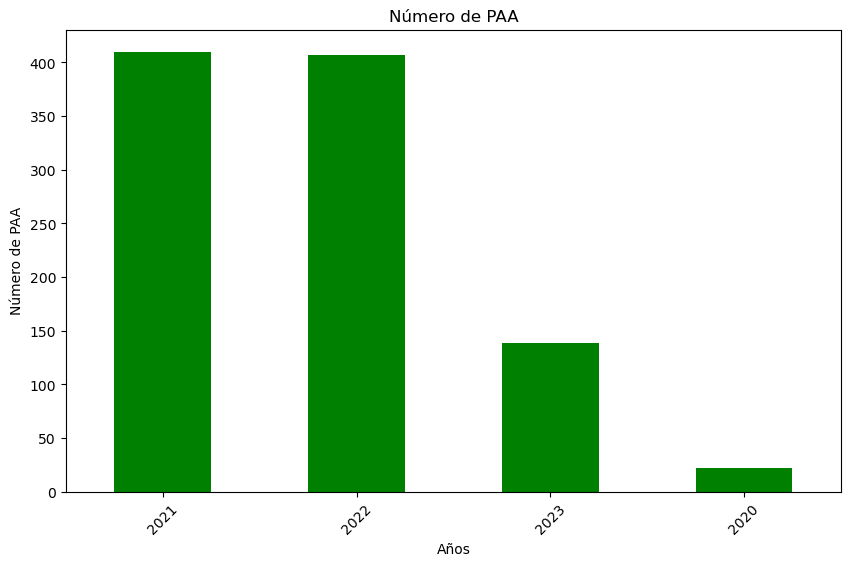

In [69]:
# Contar la cantidad de contratos
contrato_counts = dfsecop1new['anno_paa'].value_counts()

# Crear un gráfico de barras usando Matplotlib
plt.figure(figsize=(10, 6))
contrato_counts.plot(kind='bar', color='green')
plt.title('Número de PAA')
plt.xlabel('Años')
plt.ylabel('Número de PAA')
plt.xticks(rotation=45)
plt.show()

In [70]:
dfsecop1new2=dfsecop1new[dfsecop1new['ppto_total']<500000000000]

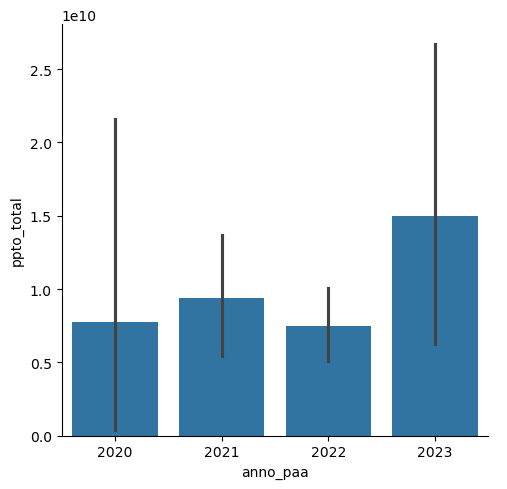

In [72]:
sns.catplot(data=dfsecop1new2, kind="bar", x="anno_paa", y='ppto_total')

### Limpieza Secop II

In [31]:
dfsecopii.head(50)

,identificador_unico,id_plan_anual_de_adquisiciones,anno,nit_entidad,nombre_entidad,mision_vision,perspectiva_estrategica,nombre_contacto,telefono_contacto,correo_contacto,valor_presupuesto_general,presupuesto_menor_cuantia,presupuesto_minima_cuantia,fecha_de_publicacion,fecha_de_creacion,fecha_de_ultima_modificacion,version,identificador_requerimiento_compra,estado,departamento_paa,municipio_paa
0,CO1.APP.2041264,MarketplaceCO1538159,2024,721520377,INSTITUCION EDUCATIVA AGROPECUARIA MAXIMO GOMEZ,MISION 2023 2026 La Institucin Educativa Agrop...,Ser una institucin destacada por sus estrategi...,MARIA EUGENIA LEDESMA LLANTEN,3104661182,mariaeugenia.maestra@gmail.com,98097506.0,$26000000.0,$2600000.0,2024-07-31 03:47:42.6041815,2024-08-23 07:11:00.0000000,2024-08-22 20:32:26.391947400,2,CO1.PPI.33807381,Borrador,Cauca,Cajibío
1,CO1.APP.2041602,MarketplaceCO1538240,2024,718938582,INSTITUCION EDUCATIVA MUNICIPAL EL SOCORRO,MISION Brindar una formacin acadmica que forme...,El proceso de formacin de los educandos debe e...,RAFAEL BASTIDAS SANCHEZ,3136820189,rafabastidas@hotmail.com,394955722.0,$845000000.0,$84500000.0,2024-01-31 16:19:08.5384812,2024-08-23 07:11:00.0000000,2024-08-22 22:00:52.607658300,13,CO1.PPI.33809817,No especificado,Nariño,Pasto
2,CO1.APP.2041198,MarketplaceCO1538184,2024,703036004,MUNICIPIO LA DORADA,La administracin municipal regir los destinos ...,La Dorada ser un municipio competitivo y soste...,JULIAN DAVID OLIVEROS SERRANO,8572013,compras@ladorada-caldas.gov.co,81756864004.0,$364000000.0,$36400000.0,2024-01-17 20:54:03.3001599,2024-08-23 07:11:00.0000000,2024-08-22 21:03:45.672865800,28,CO1.PPI.33808340,Borrador,Caldas,La Dorada
3,CO1.APP.2041074,MarketplaceCO1538121,2024,723119863,COOAGUAS DE PUEBLO NUEVO E.S.P.,MISION LA ADMINISTRACION PBLICA COOPERATIVA EM...,POLITICA DE CALIDAD Somos un organismo pblico ...,CARLOS FERNANDO GERMAN CALAO,3127695263,carlosgcalao@outlook.com,$1006390000.0,174000000.0,116000000.0,2024-02-01 02:01:48.3772533,2024-08-23 07:11:00.0000000,2024-08-22 19:47:30.908245300,2,CO1.PPI.33805980,Borrador,Córdoba,Pueblo Nuevo
4,CO1.APP.2041030,MarketplaceCO1415172,2024,705153815,MUNICIPIO DE LA PLATA,Gestionar servir a la comunidad promover el bi...,A travs de la implementacin del presente Plan ...,CRISTINA HOLGUIN GRISALES,3223001245,almacen@laplata-huila.gov.co,17288164198.0,$364000000.0,$36400000.0,2024-01-10 15:55:50.6223556,2024-08-23 07:11:00.0000000,2024-08-22 15:48:03.701324800,148,CO1.PPI.33799556,Publicado,Huila,La Plata
5,CO1.APP.2041331,MarketplaceCO1538158,2024,700103047-0,ALCALDIA MUNICIPAL SAN PEDRO DE URABA,MISIN UN SAN PEDRO MEJOR PARA TODOS propende ...,El programa de gobierno se fundamenta en propu...,Alexnder Gonzlez Velsquez,(4) 820 5503,gobierno@sanpedrodeuraba-antioquia.gov.co,$30436884240.0,$364000000.0,36400000.0,2024-01-31 22:46:42.2587993,2024-08-23 07:11:00.0000000,2024-08-22 16:38:27.587837500,290,CO1.PPI.33801089,No especificado,Antioquia,San Pedro De Uraba
6,CO1.APP.2040965,MarketplaceCO1538095,2024,718583644,INSTITUCION EDUCATIVA ISABEL DE LA TRINIDAD,No Definido,No Definido,ANTONIO JOSE CHARRIS BACCA,4241434,antoniocharrisbacca@hotmail.com,74184868.0,999999999.0,$99999999.0,2024-03-11 20:37:12.1175921,2024-08-23 07:11:00.0000000,2024-08-22 19:24:38.710254500,3,CO1.PPI.33805336,Borrador,Magdalena,Ciénaga
7,CO1.APP.2040974,MarketplaceCO1538126,2024,702644097,CORPORACION AUTONOMA REGIONAL DEL CAUCA 12,Promover y propiciar el desarrollo sostenible ...,Cauca ambiental y sostenible ha sido construid...,KAREN MELENDEZ ESPAÑA,3127450663,paa@crc.gov.co,14091044416.0,364000000.0,36400000.0,2024-01-11 15:56:06.4569245,2024-08-23 07:11:00.0000000,2024-08-22 19:49:10.142402400,54,CO1.PPI.33805872,Borrador,Cauca,Popayán
8,CO1.APP.2041421,MarketplaceCO1538245,2024,706537669,ALCALDIA MUNICIPIO DE CALDAS BOYACÁ,Misin Somos un ente territorial con vocacin de...,No Definido,ERIKA YOLANDA NUÑEZ PINILLA,3023300249,gobierno@caldas-boyaca.gov.co,3885622635.0,364000000.0,$36400

In [32]:
dfsecopii.columns

Index(['identificador_unico', 'id_plan_anual_de_adquisiciones', 'anno',
       'nit_entidad', 'nombre_entidad', 'mision_vision',
       'perspectiva_estrategica', 'nombre_contacto', 'telefono_contacto',
       'correo_contacto', 'valor_presupuesto_general',
       'presupuesto_menor_cuantia', 'presupuesto_minima_cuantia',
       'fecha_de_publicacion', 'fecha_de_creacion',
       'fecha_de_ultima_modificacion', 'version',
       'identificador_requerimiento_compra', 'estado', 'departamento_paa',
       'municipio_paa'],
      dtype='object')

In [33]:
dfsecopii.shape

(1000, 21)

In [34]:
dfsecopii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   identificador_unico                 1000 non-null   object
 1   id_plan_anual_de_adquisiciones      1000 non-null   object
 2   anno                                1000 non-null   int64 
 3   nit_entidad                         1000 non-null   object
 4   nombre_entidad                      1000 non-null   object
 5   mision_vision                       1000 non-null   object
 6   perspectiva_estrategica             1000 non-null   object
 7   nombre_contacto                     1000 non-null   object
 8   telefono_contacto                   1000 non-null   object
 9   correo_contacto                     1000 non-null   object
 10  valor_presupuesto_general           1000 non-null   object
 11  presupuesto_menor_cuantia           1000 non-null   objec

In [35]:
dfsecopii.duplicated().sum()

0

In [36]:
#Instanciamos la clase
limpieza2 = DataSetCleaning(dfsecopii)

In [37]:
limpieza2.count_unique_values('nombre_entidad')

nombre_entidad
Empresa Nacional Promotora del Desarrollo Territorial S.A  ENTerritorio S.A             4
AGENCIA NACIONAL DE TIERRAS - ANT                                                        4
INSTITUTO DEPARTAMENTAL DE SALUD DE NORTE DE SANTANDER                                   3
SENA DIRECCION GENERAL                                                                   3
  Empresa Nacional Promotora del Desarrollo Territorial S.A  ENTerritorio S.A           3
                                                                                        ..
INSTITUCION EDUCATIVA AGROECOLOGICA LA PLAYA                                             1
PERSONERIA DE GIRARDOTA                                                                  1
  ALCALDIA DE FLORENCIA CAUCA                                                            1
DIRECCIO@N TERRITORIAL ANDES OCCIDENTALES DE PARQUES NACIONALES NATURALES DE COLOMBIA    1
INSTITUCIÓN EDUCATIVA DON QUIJOTE                                          

In [38]:
limpieza2.count_unique_values('departamento_paa')

departamento_paa
Distrito Capital de Bogotá                  146
Antioquia                                   127
Cundinamarca                                 73
Boyacá                                       61
Santander                                    60
Valle del Cauca                              44
Huila                                        42
Caldas                                       38
Tolima                                       36
Córdoba                                      34
Meta                                         29
Cesar                                        29
Nariño                                       28
Bolívar                                      28
Cauca                                        26
Risaralda                                    25
Norte de Santander                           24
Sucre                                        23
Atlántico                                    20
Casanare                                     19
Caquetá                

In [39]:
limpieza2.count_unique_values('anno')

anno
2024    585
2023    168
2022    120
2021     31
2020     27
2019     26
2018     22
2017     14
2016      6
2025      1
Name: count, dtype: int64

In [40]:
limpieza2.count_unique_values('estado')

estado
Publicado          653
Borrador           238
No especificado     74
Aprobado            34
Importando           1
Name: count, dtype: int64

In [41]:
dfsecopii[dfsecopii['anno']==2025]

,identificador_unico,id_plan_anual_de_adquisiciones,anno,nit_entidad,nombre_entidad,mision_vision,perspectiva_estrategica,nombre_contacto,telefono_contacto,correo_contacto,valor_presupuesto_general,presupuesto_menor_cuantia,presupuesto_minima_cuantia,fecha_de_publicacion,fecha_de_creacion,fecha_de_ultima_modificacion,version,identificador_requerimiento_compra,estado,departamento_paa,municipio_paa
48,CO1.APP.2041038,MarketplaceCO1537961,2025,700698038,UNIVERSIDAD NACIONAL DE COLOMBIA,No Definido,No Definido,adsffgas,3134766396,leflorezt@unal.edu.co,0.0,10000000000.0,$1000000000.0,2022-01-01 00:00:00.0000000,2024-08-23 07:11:00.0000000,2024-08-23 07:11:00.0000000,1,CO1.PPI.33799903,Borrador,Distrito Capital de Bogotá,No definido


In [42]:
dfsecopii=dfsecopii[dfsecopii['anno']!=2025]

In [43]:
#Instanciamos la clase
limpieza2 = DataSetCleaning(dfsecopii)
limpieza2.count_unique_values('anno')

anno
2024    585
2023    168
2022    120
2021     31
2020     27
2019     26
2018     22
2017     14
2016      6
Name: count, dtype: int64

In [44]:
limpieza2.special_characters()

{'identificador_unico': [],
 'id_plan_anual_de_adquisiciones': [],
 'anno': [],
 'nit_entidad': ['-'],
 'nombre_entidad': ['Ñ',
  '+',
  'º',
  '-',
  '(',
  '<',
  '>',
  '\x94',
  '*',
  '\\',
  '[',
  '|',
  '{',
  '"',
  "'",
  'á',
  'é',
  ']',
  'Á',
  '\x93',
  '$',
  'Ó',
  '}',
  ':',
  'Ú',
  'Ü',
  '%',
  '@',
  '?',
  'ó',
  'í',
  'É',
  '\x96',
  '!',
  '#',
  '^',
  ';',
  ',',
  ')',
  '°',
  '_',
  '=',
  '&',
  'Í',
  'ú',
  '/'],
 'mision_vision': ['Ñ', 'ñ'],
 'perspectiva_estrategica': ['Ñ', 'ñ'],
 'nombre_contacto': ['Ñ',
  'ñ',
  '(',
  '>',
  '\\',
  '*',
  '[',
  '|',
  '{',
  "'",
  '"',
  ']',
  '$',
  '}',
  ':',
  '%',
  '@',
  '?',
  '¿',
  '!',
  '#',
  '^',
  ',',
  ';',
  ')',
  '_',
  '&',
  '<',
  '/'],
 'telefono_contacto': ['+', ',', ')', '(', '-'],
 'correo_contacto': ['_', '@', 'ó', 'í', '-'],
 'valor_presupuesto_general': ['$'],
 'presupuesto_menor_cuantia': [',', '+', '$'],
 'presupuesto_minima_cuantia': [',', '+', '$'],
 'fecha_de_publicacion':

Hay que ajustar los campos que deberian ser numericos, validemos con los caracteres especiales tipo num

In [45]:
limpieza2.special_characters_num()

{'identificador_unico': ['O', 'A', 'P', 'C', '.'],
 'id_plan_anual_de_adquisiciones': ['O',
  't',
  'c',
  'M',
  'r',
  'a',
  'C',
  'e',
  'l',
  'k',
  'p'],
 'anno': [],
 'nit_entidad': ['-'],
 'nombre_entidad': ['+',
  'c',
  'º',
  'o',
  'Z',
  '>',
  '\x94',
  'R',
  'é',
  'Á',
  'J',
  'V',
  'X',
  'r',
  '?',
  'I',
  '\x96',
  'Y',
  '!',
  '#',
  '^',
  '°',
  'y',
  'e',
  'G',
  's',
  ' ',
  'a',
  '(',
  'g',
  '[',
  '|',
  'n',
  'p',
  'É',
  'f',
  ';',
  ')',
  '<',
  'W',
  'D',
  '{',
  '-',
  'O',
  'U',
  'm',
  'u',
  "'",
  'á',
  ']',
  'K',
  '}',
  'P',
  '@',
  'i',
  'd',
  ',',
  'B',
  'h',
  'Í',
  'ú',
  'j',
  'Ñ',
  't',
  'L',
  'b',
  'Q',
  'v',
  'H',
  '\\',
  '*',
  '"',
  'C',
  '\x93',
  '$',
  'Ó',
  'E',
  ':',
  'F',
  'Ú',
  'Ü',
  'M',
  '%',
  'N',
  'l',
  'ó',
  'í',
  'x',
  'A',
  '_',
  '=',
  'T',
  '.',
  'S',
  '&',
  '/'],
 'mision_vision': ['Ñ',
  'O',
  ' ',
  't',
  'c',
  'o',
  'ñ',
  'L',
  'b',
  'Q',
  'a',
  'v',

Nos hace detectar unos caracteres particulares en presupuesto menor cuantia y presupuesto minima cuantia, revisaremos con mas detalle, adiconal nit viene bastante limpio, comparado con al otra fuente

In [46]:
dfsecopii[dfsecopii['presupuesto_menor_cuantia'].str.contains('E', case=False, na=False)]

,identificador_unico,id_plan_anual_de_adquisiciones,anno,nit_entidad,nombre_entidad,mision_vision,perspectiva_estrategica,nombre_contacto,telefono_contacto,correo_contacto,valor_presupuesto_general,presupuesto_menor_cuantia,presupuesto_minima_cuantia,fecha_de_publicacion,fecha_de_creacion,fecha_de_ultima_modificacion,version,identificador_requerimiento_compra,estado,departamento_paa,municipio_paa
95,CO1.APP.2041195,MarketplaceCO1538167,2024,721472256,E.S.E. HOSPITAL DEPARTAMENTAL= INTERCULTURAL...,La misin Prestar servicios de salud con los m...,Fortalecer y complementar el portafolio de ser...,ESE Hospital Departamental Intercultural Renac...,3208313592,compraseserenacer@gmail.com,$40033827000.0,"1,00E+34",580000000.0,2024-01-01 21:37:28.1937080,2024-08-23 07:11:00.0000000,2024-08-22 20:39:39.264121400,6,CO1.PPI.33807663,Borrador,Guainía,Inírida
118,CO1.APP.2041260,MarketplaceCO1413399,2024,704325166,EMPRESA SOCIAL DEL ESTADO HOSPITAL REGIONAL SA...,MISION Somos la institucin Social del Estado H...,LA ESE HOSPITAL REGIONAL DE SAN GIL se consoli...,HORBES BRANLING BUITRAGO MATEUS,6077235510,gerencia@hregionalsangil.gov.co,50734364675.0,"1,00E+34","1,00E+34",2024-01-03 22:43:56.2633854,2024-08-23 07:11:00.0000000,2024-08-22 23:19:51.240812300,26,CO1.PPI.33807305,Publicado,Santander,San Gil
154,CO1.APP.2041607,MarketplaceCO1441546,2024,719626228,INSTITUCION EDUCATIVA CACAOTAL DE CHINU,MISION La institucin educativa cacaotal centra...,La institucin educativa cacaotal tiene como es...,HUGO ELIAS PATERNINA PINEDA,3245327869,hpaternina70@gmail.com,89427526.0,"1,00E+34","1,00E+34",2024-02-16 22:58:35.7512161,2024-08-23 07:11:00.0000000,2024-08-22 23:12:47.592711200,11,CO1.PPI.33809890,Publicado,Córdoba,Chinú
165,CO1.APP.2041134,MarketplaceCO1431844,2024,704331255,ESE HOS=PITAL LOCAL DE PIEDECUESTA,MISIN INSTITUCIONALSOMOS UN HOSPITAL PBLICO DE...,PRESTAMOS SERVICIOS DE SALUD DE MANERA INTEGRA...,MELISA ANDREA MACHADO REYES,3023760954,SUBDIRECCION@HLP.GOV.CO,$14977621379.0,"1,00E+34",780000000.0,2024-02-01 00:22:26.0156456,2024-08-23 07:11:00.0000000,2024-08-22 20:11:40.955894000,18,CO1.PPI.33797649,Publicado,Santander,Piedecuesta
398,CO1.APP.2041122,MarketplaceCO1412304,2024,703688390,ESE HOSPITAL SAN JUAN DE DIOS DE FLORIDABLANCA,MISIN Somos una institucin Pblica Departamenta...,En el periodo 2024 la ESE Hospital San Juan de...,MONICA BARRIOS BASTIDAS,3133954993,gerencia@hospiflorida.gov.co,$21226325286.0,"1,00E+34","1,00E+34",2023-12-30 00:13:51.6844053,2024-08-23 07:11:00.0000000,2024-08-22 14:22:46.990092900,20,CO1.PPI.33796142,Publicado,Santander,Floridablanca
954,CO1.APP.1757857,MarketplaceCO1286990,2023,709269427,Institución Educativa San Miguel Abajo],Es misin de la Institucin Educativa rural San ...,Formar personas con calidad acadmica espritu s...,EMILIO JOSE FLOREZ GUERRA,3126813456,ee_22367800045001@hotmail.com,$65483440.0,"1,00E+34","1,00E+34",2023-02-02 01:15:56.6033596,2024-08-09 19:40:53.0000000,2023-12-20 22:20:37.208411600,8,CO1.PPI.28947106,Publicado,Córdoba,San Carlos


vemos que el valor es 1,00E+34, esto es numero inmenso y ocurre en dos columnas de presupuesto, debe ser un error, en este caso no los eliminare si no los cambiare por 0.


In [47]:
dfsecopii['presupuesto_menor_cuantia'] = dfsecopii['presupuesto_menor_cuantia'].str.replace('1,00E+34', '0', case=False)
dfsecopii['presupuesto_minima_cuantia'] = dfsecopii['presupuesto_minima_cuantia'].str.replace('1,00E+34', '0', case=False)

Con esto ya podemos aplicar remover los caracteres especiales

In [48]:
limpieza2.remove_special_characters('nit_entidad')
limpieza2.remove_special_characters('valor_presupuesto_general')
limpieza2.remove_special_characters('presupuesto_menor_cuantia')
limpieza2.remove_special_characters('presupuesto_minima_cuantia')

,identificador_unico,id_plan_anual_de_adquisiciones,anno,nit_entidad,nombre_entidad,mision_vision,perspectiva_estrategica,nombre_contacto,telefono_contacto,correo_contacto,valor_presupuesto_general,presupuesto_menor_cuantia,presupuesto_minima_cuantia,fecha_de_publicacion,fecha_de_creacion,fecha_de_ultima_modificacion,version,identificador_requerimiento_compra,estado,departamento_paa,municipio_paa
0,CO1.APP.2041264,MarketplaceCO1538159,2024,721520377,INSTITUCION EDUCATIVA AGROPECUARIA MAXIMO GOMEZ,MISION 2023 2026 La Institucin Educativa Agrop...,Ser una institucin destacada por sus estrategi...,MARIA EUGENIA LEDESMA LLANTEN,3104661182,mariaeugenia.maestra@gmail.com,98097506.0,26000000.0,2600000.0,2024-07-31 03:47:42.6041815,2024-08-23 07:11:00.0000000,2024-08-22 20:32:26.391947400,2,CO1.PPI.33807381,Borrador,Cauca,Cajibío
1,CO1.APP.2041602,MarketplaceCO1538240,2024,718938582,INSTITUCION EDUCATIVA MUNICIPAL EL SOCORRO,MISION Brindar una formacin acadmica que forme...,El proceso de formacin de los educandos debe e...,RAFAEL BASTIDAS SANCHEZ,3136820189,rafabastidas@hotmail.com,394955722.0,845000000.0,84500000.0,2024-01-31 16:19:08.5384812,2024-08-23 07:11:00.0000000,2024-08-22 22:00:52.607658300,13,CO1.PPI.33809817,No especificado,Nariño,Pasto
2,CO1.APP.2041198,MarketplaceCO1538184,2024,703036004,MUNICIPIO LA DORADA,La administracin municipal regir los destinos ...,La Dorada ser un municipio competitivo y soste...,JULIAN DAVID OLIVEROS SERRANO,8572013,compras@ladorada-caldas.gov.co,81756864004.0,364000000.0,36400000.0,2024-01-17 20:54:03.3001599,2024-08-23 07:11:00.0000000,2024-08-22 21:03:45.672865800,28,CO1.PPI.33808340,Borrador,Caldas,La Dorada
3,CO1.APP.2041074,MarketplaceCO1538121,2024,723119863,COOAGUAS DE PUEBLO NUEVO E.S.P.,MISION LA ADMINISTRACION PBLICA COOPERATIVA EM...,POLITICA DE CALIDAD Somos un organismo pblico ...,CARLOS FERNANDO GERMAN CALAO,3127695263,carlosgcalao@outlook.com,1006390000.0,174000000.0,116000000.0,2024-02-01 02:01:48.3772533,2024-08-23 07:11:00.0000000,2024-08-22 19:47:30.908245300,2,CO1.PPI.33805980,Borrador,Córdoba,Pueblo Nuevo
4,CO1.APP.2041030,MarketplaceCO1415172,2024,705153815,MUNICIPIO DE LA PLATA,Gestionar servir a la comunidad promover el bi...,A travs de la implementacin del presente Plan ...,CRISTINA HOLGUIN GRISALES,3223001245,almacen@laplata-huila.gov.co,17288164198.0,364000000.0,36400000.0,2024-01-10 15:55:50.6223556,2024-08-23 07:11:00.0000000,2024-08-22 15:48:03.701324800,148,CO1.PPI.33799556,Publicado,Huila,La Plata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CO1.APP.981003,MarketplaceCO1159012,2021,7014336743,DEPARTAMENTO ADMINISTRATIVO DE LA DEFENSORIA D...,MISION Contribuir al mejoramiento de la calida...,1Contribuir al incremento del uso goce y disfr...,/CARLOS ALFONSO QUINTERO MENA,3822510 1032,cquintero@dadep.gov.co,27027845416.0,254387280.0,25438728.0,2021-01-14 13:56:08.3550442,2024-08-09 19:40:53.0000000,2021-09-07 17:48:04.020848600,23,CO1.PPI.14941473,No especificado,Distrito Capital de Bogotá,Bogotá
996,CO1.APP.1946556,MarketplaceCO1494508,2024,7185960008,INSTITUCION EDUCATIVA EL PARAMO*,MISION La institucin Educativa El Pramo es una...,La Institucin educativa EL PARAMO para el cump...,HELI RAFAEL DAZA MATACEA,3113339424,ie.paramo.taminango@sednarino.gov.co,40200000.0,1105000000.0,110500000.0,2024-02-01 00:22:06.6399269,2024-08-09 19:40:53.0000000,2024-05-30 17:43:48.585691500,2,CO1.PPI.32140664,Aprobado,Nariño,Taminango
997,CO1.APP.1640158,MarketplaceCO1370463,2022,7098792172,CONTRALORIA DISTRITAL DE BUENAVENTURA,Ejercer eficientemente la vigilancia de la ges...,El Plan Anual de Adquisiciones es un documento...,VIVIANA GONZALEZ VIVAS,3178124179,talentohumano@contraloriabuenaventura.gov.co,899802000.0,280000000.0,28000000.0,2022-02-08 22:14:35.2824387,2024-08-09 19:40:53.0000000,2023-08-17 22:50:41.294767000,7,CO1.PPI.26793161,Borrador,Valle del Cauca,Buenaventura
998,CO1.APP.1370001,MarketplaceCO1227734,2022,718687114,IN

Intentemos ajustar los tipos de datos

In [51]:
dfsecopii['nit_entidad'] = dfsecopii['nit_entidad'].astype('Int64')
dfsecopii['presupuesto_menor_cuantia'] = dfsecopii['presupuesto_menor_cuantia'].astype(float)
dfsecopii['presupuesto_minima_cuantia'] = dfsecopii['presupuesto_minima_cuantia'].astype(float)

In [52]:
dfsecopii['valor_presupuesto_general'] = dfsecopii['valor_presupuesto_general'].astype(float)

ValueError: could not convert string to float: ' 4.098.198.993.012.250'

Vemos que es otro error de digitacion ya que esto supera el valor de todo el presupuesto de la nación

In [53]:
dfsecopii[dfsecopii['valor_presupuesto_general'].str.len() > 19]

,identificador_unico,id_plan_anual_de_adquisiciones,anno,nit_entidad,nombre_entidad,mision_vision,perspectiva_estrategica,nombre_contacto,telefono_contacto,correo_contacto,valor_presupuesto_general,presupuesto_menor_cuantia,presupuesto_minima_cuantia,fecha_de_publicacion,fecha_de_creacion,fecha_de_ultima_modificacion,version,identificador_requerimiento_compra,estado,departamento_paa,municipio_paa
259,CO1.APP.2041712,MarketplaceCO1416226,2024,700077019,MINISTERIO DE MINAS Y ENERGIA,Formular y adoptar polticas dirigidas al aprov...,Desarrollo sostenible transformacin sectorial ...,LESLIE MAYERLI RODRIGUEZ MUÑOZ,6012200300,lmrodriguezm@minenergia.gov.co,4.098.198.993.012.250,1.300000e+09,130000000.0,2024-01-12 04:59:02.1178131,2024-08-23 07:11:00.0000000,2024-08-23 00:43:08.311855300,115,CO1.PPI.33813010,Publicado,Distrito Capital de Bogotá,Bogotá
481,CO1.APP.2041154,MarketplaceCO1537960,2024,700613045,MINISTERIO DEL DEPORTE,Misin Formular liderar y orientar una poltica ...,Fortalecer la institucionalidad y la articulac...,Edin Yamit Martnez Rodrguez,4377030,edmartinez@mindeporte.gov.co,9.949.602.547.837.650,1.105000e+09,110500000.0,2024-01-17 00:04:42.1740258,2024-08-23 07:11:00.0000000,2024-08-22 15:50:56.820979700,16,CO1.PPI.33800007,Borrador,Distrito Capital de Bogotá,Bogotá


In [54]:
dfsecopii.loc[dfsecopii['valor_presupuesto_general'].str.len() > 19, 'valor_presupuesto_general'] = 0

In [55]:
dfsecopii['valor_presupuesto_general'] = dfsecopii['valor_presupuesto_general'].astype(float)

ValueError: could not convert string to float: ' 131.420.847.903'

In [56]:
dfsecopii['valor_presupuesto_general'] = dfsecopii['valor_presupuesto_general'].str.replace(' 131.420.847.903', ' 131420847903', case=False)

In [57]:
dfsecopii['valor_presupuesto_general'] = dfsecopii['valor_presupuesto_general'].astype(float)

Adional dejaremos el id de plan anual de adquisiciones como número

In [58]:
dfsecopii['id_plan_anual_de_adquisiciones'] = dfsecopii['id_plan_anual_de_adquisiciones'].str.replace('MarketplaceCO', '', case=False)

In [59]:
dfsecopii['id_plan_anual_de_adquisiciones'] = dfsecopii['id_plan_anual_de_adquisiciones'].astype(int)

In [60]:
dfsecopii.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   identificador_unico                 999 non-null    object 
 1   id_plan_anual_de_adquisiciones      999 non-null    int32  
 2   anno                                999 non-null    int64  
 3   nit_entidad                         999 non-null    Int64  
 4   nombre_entidad                      999 non-null    object 
 5   mision_vision                       999 non-null    object 
 6   perspectiva_estrategica             999 non-null    object 
 7   nombre_contacto                     999 non-null    object 
 8   telefono_contacto                   999 non-null    object 
 9   correo_contacto                     999 non-null    object 
 10  valor_presupuesto_general           997 non-null    float64
 11  presupuesto_menor_cuantia           999 non-null  

probemos algunos graficos

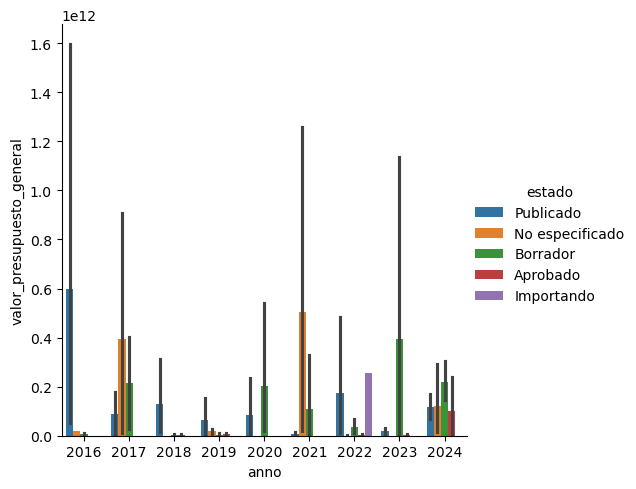

In [74]:

sns.catplot(data=dfsecopii, kind="bar", x="anno", y='valor_presupuesto_general',hue='estado')

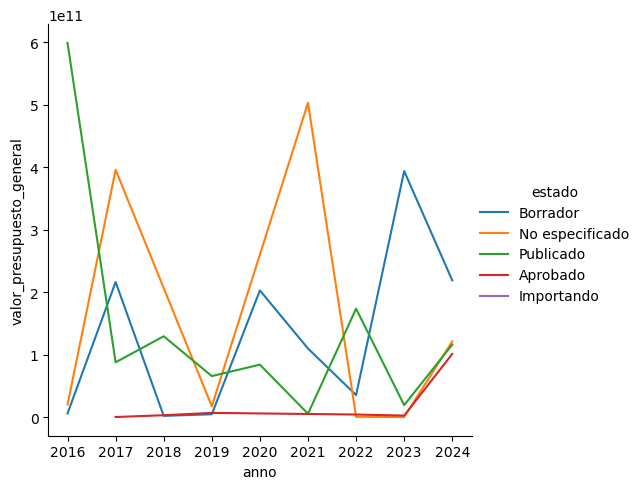

In [79]:
sns.relplot(data=dfsecopii, kind="line", x="anno", y='valor_presupuesto_general',hue='estado',errorbar=None,markers=True)

Los datos en secop ii vienen mas limpios, sin embargo simepre en los valores de dinero se encuentran valores que nos nos permitian hacer la transforcaion adecuada de tipo de datos.

Ahora cone sto podremos unir los dos df, para ellos como cada uno tiene que ver con los planes presupuestales para las diferentes entidades del pais en cada sistema secopi y secopii, no podremos cruzar la informacion por que ninguna tiene relacion con al otra, sin embago debemos poder concatenarla para consolidar la información

### Concatenar los dos Dataframes SecopI y SecopII

vamos a dejar solo las columnas que queremos concatenar de cada dataset para ellos nuevamente reviso cada columna de ellas

In [61]:
dfsecop1new.columns

Index(['identificador_paa', 'codigo_entidad', 'nombre_entidad', 'nit_entidad',
       'anno_paa', 'direccion_entidad', 'telefono_entidad', 'mision_y_vision',
       'perspectiva_estrategica', 'info_contacto', 'ppto_total',
       'limite_menor_cuantia', 'limite_minima_cuantia',
       'fecha_ultima_actualizacion', 'fecha_cargue', 'municipio_paa',
       'departamento_paa', 'localidad_paa', 'codigo_municipio'],
      dtype='object')

In [62]:
lista_columnas=['identificador_paa','nit_entidad','nombre_entidad','anno_paa','info_contacto','departamento_paa','municipio_paa','ppto_total','limite_menor_cuantia','limite_minima_cuantia']
dffinal_secopi=dfsecop1new[lista_columnas]
nuevos_nombres=['identificador','nit_entidad','nombre_entidad','anno_paa','contacto','departamento','municipio','ppto_total','menor_cuantia','minima_cuantia']
dffinal_secopi.columns=nuevos_nombres
dffinal_secopi['origen']='SECOPI'

C:\Users\mguerra\AppData\Local\Temp\ipykernel_29896\3686838227.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffinal_secopi['origen']='SECOPI'


In [63]:
dffinal_secopi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   identificador   978 non-null    int64  
 1   nit_entidad     978 non-null    Int64  
 2   nombre_entidad  978 non-null    object 
 3   anno_paa        978 non-null    int64  
 4   contacto        976 non-null    object 
 5   departamento    978 non-null    object 
 6   municipio       978 non-null    object 
 7   ppto_total      976 non-null    float64
 8   menor_cuantia   968 non-null    float64
 9   minima_cuantia  968 non-null    float64
 10  origen          978 non-null    object 
dtypes: Int64(1), float64(3), int64(2), object(5)
memory usage: 92.6+ KB


In [64]:
dfsecopii.columns

Index(['identificador_unico', 'id_plan_anual_de_adquisiciones', 'anno',
       'nit_entidad', 'nombre_entidad', 'mision_vision',
       'perspectiva_estrategica', 'nombre_contacto', 'telefono_contacto',
       'correo_contacto', 'valor_presupuesto_general',
       'presupuesto_menor_cuantia', 'presupuesto_minima_cuantia',
       'fecha_de_publicacion', 'fecha_de_creacion',
       'fecha_de_ultima_modificacion', 'version',
       'identificador_requerimiento_compra', 'estado', 'departamento_paa',
       'municipio_paa'],
      dtype='object')

In [65]:
lista_columnas=['id_plan_anual_de_adquisiciones','nit_entidad','nombre_entidad','anno','nombre_contacto','departamento_paa','municipio_paa','valor_presupuesto_general','presupuesto_menor_cuantia','presupuesto_minima_cuantia']
dffinal_secopii=dfsecopii[lista_columnas]
nuevos_nombres=['identificador','nit_entidad','nombre_entidad','anno_paa','contacto','departamento','municipio','ppto_total','menor_cuantia','minima_cuantia']
dffinal_secopii.columns=nuevos_nombres
dffinal_secopii['origen']='SECOPII'

C:\Users\mguerra\AppData\Local\Temp\ipykernel_29896\1641855697.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffinal_secopii['origen']='SECOPII'


In [66]:
dffinal_secopii.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   identificador   999 non-null    int32  
 1   nit_entidad     999 non-null    Int64  
 2   nombre_entidad  999 non-null    object 
 3   anno_paa        999 non-null    int64  
 4   contacto        999 non-null    object 
 5   departamento    999 non-null    object 
 6   municipio       999 non-null    object 
 7   ppto_total      997 non-null    float64
 8   menor_cuantia   999 non-null    float64
 9   minima_cuantia  999 non-null    float64
 10  origen          999 non-null    object 
dtypes: Int64(1), float64(3), int32(1), int64(1), object(5)
memory usage: 90.7+ KB


Una vez se ajustan los nombres y se selecionan las columnas a unir procedemos con la union de estos

In [67]:
df_concatenado = pd.concat([dffinal_secopi, dffinal_secopii], axis=0, ignore_index=True)

In [68]:
df_concatenado

,identificador,nit_entidad,nombre_entidad,anno_paa,contacto,departamento,municipio,ppto_total,menor_cuantia,minima_cuantia,origen
0,303062,891855029,CASANARE ESE HOSPITAL DE YOPAL,2022,Almacen Hospital Regional de la Orinoquia Cont...,Casanare,Yopal,1.268981e+11,NaN,0.0,SECOPI
1,294652,900196642,ANTIOQUIA INSTITUCIN EDUCATIVA DBORA ARANGO P...,2022,Carlos Enrique Rojas Sanchez,Antioquia,Medellín,8.402664e+07,0.000000e+00,20000000.0,SECOPI
2,259436,8460042335,PUTUMAYO CENTRO EDUCATIVO RURAL SAUDITA PUER...,2021,3208339785,Putumayo,Puerto Guzmán,1.077000e+08,2.543873e+08,25438728.0,SECOPI
3,263541,811017472,ANTIOQUIA INSTITUCIN EDUCATIVA SAN CRISTBAL ...,2021,La Institucin Educativa San Cristbal ofrece ...,Antioquia,Medellín,1.593392e+08,4.279180e+06,159239220.0,SECOPI
4,298985,9001342989,META CENTRO EDUCATIVO RURAL JOSE MARIA GUIOTH...,2022,LUIS FERNANDO ROJAS SALAZAR CC 17267322 Cargo ...,Meta,Cumaral,2.250000e+07,2.800000e+08,28000000.0,SECOPI
...,...,...,...,...,...,...,...,...,...,...,...
1972,1159012,7014336743,DEPARTAMENTO ADMINISTRATIVO DE LA DEFENSORIA D...,2021,/CARLOS ALFONSO QUINTERO MENA,Distrito Capital de Bogotá,Bogotá,2.702785e+10,2.543873e+08,25438728.0,SECOPII
1973,1494508,7185960008,INSTITUCION EDUCATIVA EL PARAMO*,2024,HELI RAFAEL DAZA MATACEA,Nariño,Taminango,4.020000e+07,1.105000e+09,110500000.0,SECOPII
1974,1370463,7098792172,CONTRALORIA DISTRITAL DE BUENAVENTURA,2022,VIVIANA GONZALEZ VIVAS,Valle del Cauca,Buenaventura,8.998020e+08,2.800000e+08,28000000.0,SECOPII
1975,1227734,718687114,INSTITUCION EDUCATIVA LICEO MIGUEL ANTONIO CARO,2022,HECTOR JAIME NARANJO RODAS,Córdoba,Montería,3.190250e+07,2.800000e+08,28000000.0,SECOPII


## Conclusiones

Fue un reto tratar de meojorar la calidad de los datos, ya que esta informacion tiene mucha intervencion humana, hace que sea de mayor complejidad limpiarla, sobre todo en los Nit, y en los valores de dinero, ya que se encuentran valores atipicos, que superan el presupuesto anual del pais. Claro esta que la base de Secop II estaba mas limpia y todos los campos no nulos.

es de crucial importancia este paso del EDA, que es el punto partidad para que los modelo predicctivos tengan gran acertividad con lo que se busca predecir